In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import data
path = "./Telecom+Customer+Churn/telecom_customer_churn.csv"
cus = pd.read_csv(path)
cus.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [33]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
path_zip = "./Telecom+Customer+Churn/telecom_zipcode_population.csv"
zip_pop = pd.read_csv(path_zip)
zip_pop.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [ ]:
# cus description
cus.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


# KPI

In [69]:
# total number of customers
total_num_cus = cus["Customer ID"].unique().shape[0]
print("Total number of customers:", total_num_cus)

# total number of churned customers
churned_num_cus = cus[cus["Customer Status"] == "Churned"]["Customer ID"].unique().shape[0]
print("Total number of churned customers:", churned_num_cus)

# Total renvenue, revenue defined as (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)
total_rev = cus["Total Revenue"].sum()
print("Total revenue:", total_rev)

# Revenue of churned customers
churned_rev = cus[cus["Customer Status"] == "Churned"]["Total Revenue"].sum()
print("Revenue of churned customers:", round(churned_rev,2))

# Number of customers who have Unlimited Data
unlimited_data_cus = cus[cus["Unlimited Data"] == "Yes"]["Customer ID"].unique().shape[0]
print("Number of customers who have Unlimited Data:", unlimited_data_cus)

# Average Monthly Charges of all Customers
avg_monthly_charge = cus["Monthly Charge"].mean()
print("Average Monthly Charges:",round(avg_monthly_charge,2))

Total number of customers: 7043
Total number of churned customers: 1869
Total revenue: 21371131.69
Revenue of churned customers: 3684459.82
Number of customers who have Unlimited Data: 4745
Average Monthly Charges: 63.6


# Identify high value customers
based on the following:
1. Revenue 
2. Total charges
3. Tenure in Months, how long the customer has been a customer
4. type of offer the customer has received
5. Unlimited Data plan

<Figure size 720x432 with 0 Axes>

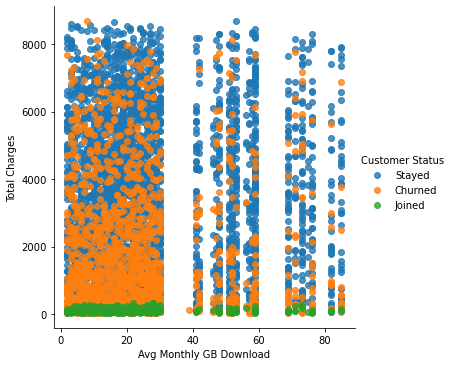

In [24]:
# scatter plot of avg mothly downloads (GB) vs total charges, hue by churn
plt.figure(figsize=(10,6))
sns.lmplot(x="Avg Monthly GB Download", y="Total Charges", data=cus, hue="Customer Status", fit_reg=False)
plt.show()

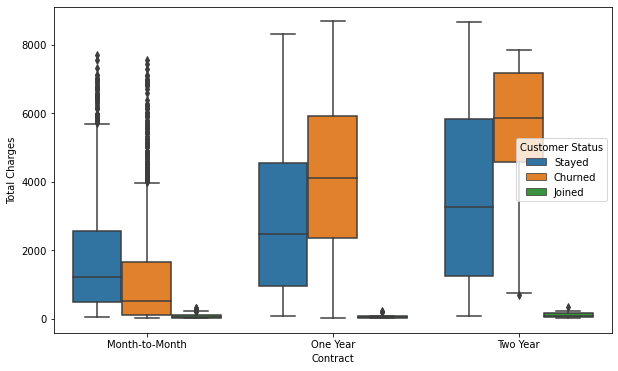

In [23]:
# scatter plot of contract type vs total charges, hue by chrun
plt.figure(figsize=(10, 6))
sns.boxplot(x="Contract", y="Total Charges",hue="Customer Status", data=cus, order=['Month-to-Month', 'One Year', 'Two Year'])
plt.show()

In [40]:
# take a look at column "Unlimited Data"
cus["Unlimited Data"].describe()


count     5517
unique       2
top        Yes
freq      4745
Name: Unlimited Data, dtype: object

In [46]:
# since not all customer have internet service
# we need a new dataframe to keep only customers with internet service
cus_with_internet = cus[cus["Internet Service"] == "Yes"]
cus_with_internet.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


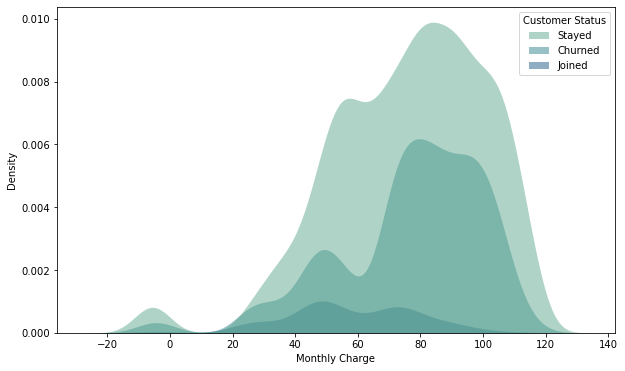

In [72]:
# kde plot of Unlimited Data vs total charges, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.kdeplot(x="Monthly Charge", hue="Customer Status", data=cus_with_internet, 
            fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=0)
plt.show()

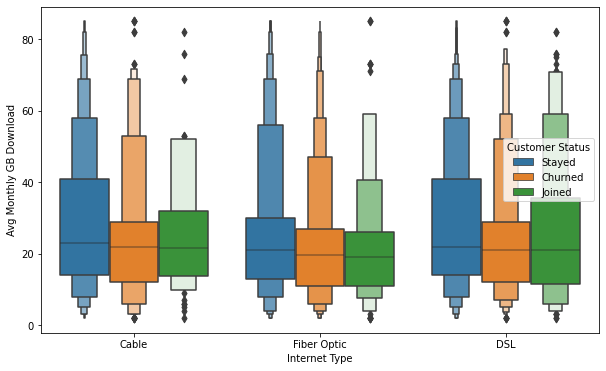

In [78]:
# Toal extra data charge, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.boxenplot(x="Internet Type", y="Avg Monthly GB Download", hue="Customer Status", data=cus_with_internet)
plt.show()

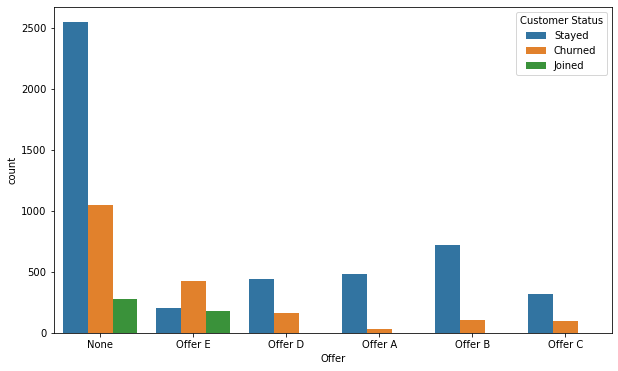

In [82]:
# count plot for offer type, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Offer", hue="Customer Status", data=cus)
plt.show()

In [86]:
# check uniqe values in column "City"
len(cus["City"].unique().tolist())

1106

In [100]:
# top 5 cities with highest Churn ratio
cus_churn_ratio = cus.groupby("City")["Customer Status"].value_counts()
print(cus_churn_ratio.head())

City      Customer Status
Acampo    Churned            3
          Stayed             1
Acton     Stayed             4
Adelanto  Stayed             4
          Churned            1
Name: Customer Status, dtype: int64
